<a href="https://colab.research.google.com/github/LinCheungS/Deep_Learning_TF2/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [0]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib as mpl
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
import os
import sys

print(tf.__version__)

2.2.0


In [0]:
# 数据集fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print((x_valid.shape, y_valid.shape),(x_train.shape, y_train.shape),(x_test.shape, y_test.shape))

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

((5000, 28, 28), (5000,)) ((55000, 28, 28), (55000,)) ((10000, 28, 28), (10000,))


In [0]:
# 10-monkey数据集
!pip install -q kaggle
!mkdir .kaggle
import json
token = {"username":"lincheung","key":"af5434648bc9a458e45451e071e8c5ea"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
!kaggle config set -n path -v /content
!kaggle datasets download -d slothkong/10-monkey-species
!unzip /content/datasets/slothkong/10-monkey-species/10-monkey-species.zip

In [0]:
# CIFAR-10
!kaggle competitions download -c cifar-10
# !unzip /content/competitions/cifar-10/sampleSubmission.csv.zip
# !7z x /content/competitions/cifar-10/test.7z
# !7z x /content/competitions/cifar-10/train.7z
# !7z x /content/drive/My\ Drive/数据集/CIFAR10/train.7z -o/content/drive/My\ Drive/数据集/CIFAR10/
!tar -zxvf /content/drive/My\ Drive/数据集/CIFAR10/test5.tar.gz > aa.text
!cp /content/drive/My\ Drive/数据集/CIFAR10/sampleSubmission.csv /content/
!cp /content/drive/My\ Drive/数据集/CIFAR10/trainLabels.csv /content/

In [0]:
# 可视化函数
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

## 基础的CNN模型

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',activation='selu',input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [0]:
logdir = './cnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4236 - accuracy: 0.8451 - val_loss: 0.3190 - val_accuracy: 0.8878
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2845 - accuracy: 0.8970 - val_loss: 0.3281 - val_accuracy: 0.8780
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2397 - accuracy: 0.9135 - val_loss: 0.2651 - val_accuracy: 0.9020
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2056 - accuracy: 0.9258 - val_loss: 0.2603 - val_accuracy: 0.9088
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1765 - accuracy: 0.9365 - val_loss: 0.2505 - val_accuracy: 0.9126
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1529 - accuracy: 0.9456 - val_loss: 0.2390 - val_accuracy: 0.9176
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1280 - accuracy: 0.9539 - val_loss: 0.2435 - val_accuracy:

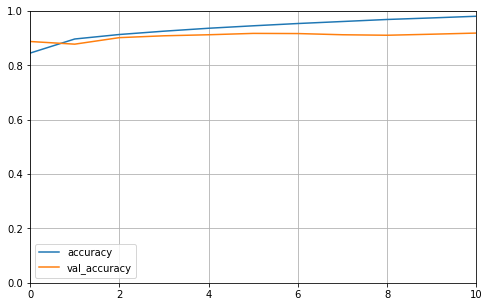

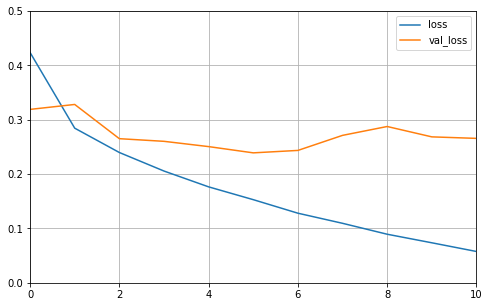

313/313 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.9137


[0.29142847657203674, 0.9136999845504761]

In [0]:
epochs = 10
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 0.5)
model.evaluate(x_test_scaled, y_test)

## 深度可分离卷积

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',activation='selu',input_shape=(28, 28, 1)))
model.add(keras.layers.SeparableConv2D(filters=32, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,padding='same',activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [0]:
logdir = './separable-cnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

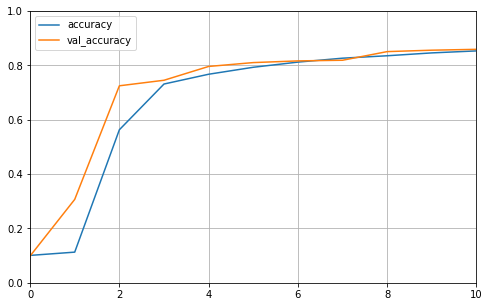

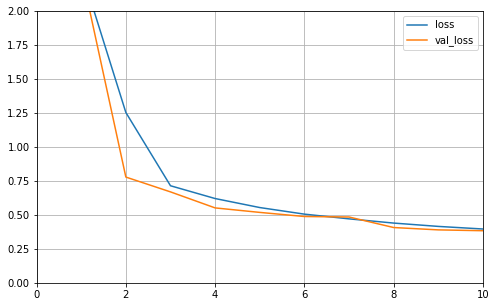

313/313 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8764


[0.34338194131851196, 0.8763999938964844]

In [0]:
epochs = 10
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)
model.evaluate(x_test_scaled, y_test)

## Resnet50

In [0]:
train_dir = "./training/training"
valid_dir = "./validation/validation"
label_file = "./monkey_labels.txt"
print(os.listdir(train_dir))
print(os.listdir(valid_dir))

labels = pd.read_csv(label_file, header=0)
print(labels[:2])

['n7', 'n9', 'n5', 'n2', 'n8', 'n4', 'n0', 'n6', 'n3', 'n1']
['n7', 'n9', 'n5', 'n2', 'n8', 'n4', 'n0', 'n6', 'n3', 'n1']
   Label   Latin Name             ...  Train Images    Validation Images
0  n0       alouatta_palliata\t   ...            131                  26
1  n1      erythrocebus_patas\t   ...            139                  28

[2 rows x 5 columns]


In [0]:
height = 224
width = 224
channels = 3
batch_size = 24
num_classes = 10

# 定义图片增强参数
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input, # 归一化
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')
# 图片生成器
train_generator = train_datagen.flow_from_directory(
    train_dir, # 将文件名加载成label的名字
    target_size = (height, width),
    batch_size = batch_size,
    seed = 666,
    shuffle = True,
    class_mode = "categorical") # onehot编码

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = keras.applications.resnet50.preprocess_input)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 7,
    shuffle = False,
    class_mode = "categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [0]:
x, y = train_generator.next()
print(x.shape, y.shape)

(24, 224, 224, 3) (24, 10)


In [0]:
resnet50_fine_tune = keras.models.Sequential()
resnet50_fine_tune.add(keras.applications.ResNet50(include_top = False,pooling = 'avg',weights = 'imagenet'))
resnet50_fine_tune.add(keras.layers.Dense(num_classes, activation = 'softmax'))
resnet50_fine_tune.layers[0].trainable = False # 第一层不可被训练

# 定义成可训练
# resnet50 = keras.applications.ResNet50(include_top = False,pooling = 'avg',weights = 'imagenet')
# for layer in resnet50.layers[0:-5]:
#   layer.trainable = False
# resnet50_new = keras.models.Sequential([
#    resnet50,
#   keras.layers.Dense(num_classes, activation = 'softmax'),])

resnet50_fine_tune.compile(loss="categorical_crossentropy",
                           optimizer="sgd", metrics=['accuracy'])
resnet50_fine_tune.summary()

In [0]:
epochs = 20
history = resnet50_fine_tune.fit_generator(
    train_generator,
    steps_per_epoch = train_num // batch_size,
    epochs = epochs,
    validation_data = valid_generator,
    validation_steps = valid_num // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
45/45 [==============================] - 38s 855ms/step - loss: 1.1122 - accuracy: 0.6815 - val_loss: 0.4432 - val_accuracy: 0.9091
Epoch 2/20
45/45 [==============================] - 39s 860ms/step - loss: 0.3379 - accuracy: 0.9339 - val_loss: 0.2339 - val_accuracy: 0.9659
Epoch 3/20
45/45 [==============================] - 39s 858ms/step - loss: 0.2188 - accuracy: 0.9562 - val_loss: 0.1757 - val_accuracy: 0.9659
Epoch 4/20
45/45 [==============================] - 38s 847ms/step - loss: 0.1698 - accuracy: 0.9637 - val_loss: 0.1361 - val_accuracy: 0.9886
Epoch 5/20
45/45 [==============================] - 39s 861ms/step - loss: 0.1345 - accuracy: 0.9767 - val_loss: 0.1255 - val_accuracy: 0.9848
Epoch 6/20
45/45 [==============================] - 38s 841ms/step - loss: 0.1344 - accuracy: 0.9767 - val_loss: 0.1063 - val_accuracy: 0.9773
Epoch 7/20
45/45 [==============================] - 39s 866ms/step

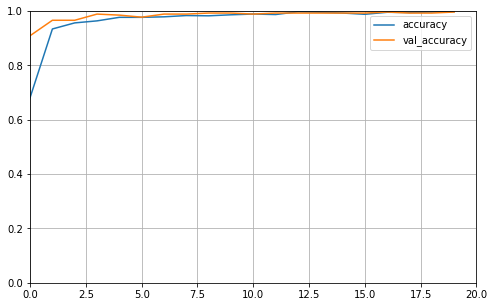

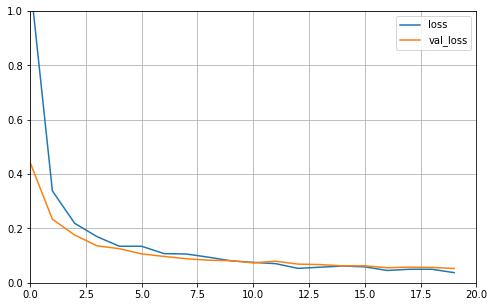

In [0]:
epochs = 20
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 1)

## CIFAR-10

In [0]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

train_lables_file = 'trainLabels.csv'
test_csv_file = 'sampleSubmission.csv'
train_folder = 'train/'
test_folder = 'test/'
# 解析csv, 生成(文件路径名称,label)
def parse_csv_file(filepath, folder):
    results = []
    with open(filepath, 'r') as f:
        lines = f.readlines()[1:] # 删除第一行标签
    for line in lines:
        image_id, label_str = line.strip('\n').split(',')
        # 生成路径+文件名, 标签
        image_full_path = os.path.join(folder, image_id + '.png')
        results.append((image_full_path, label_str))
    return results

# 生成训练数据和测数据的('train/1.png', 'frog')
train_labels_info = parse_csv_file(train_lables_file, train_folder)
test_csv_info = parse_csv_file(test_csv_file, test_folder)

print(train_labels_info[0:5])
print(test_csv_info[0:5])
print(len(train_labels_info), len(test_csv_info))

[('train/1.png', 'frog'), ('train/2.png', 'truck'), ('train/3.png', 'truck'), ('train/4.png', 'deer'), ('train/5.png', 'automobile')]
[('test/1.png', 'cat'), ('test/2.png', 'cat'), ('test/3.png', 'cat'), ('test/4.png', 'cat'), ('test/5.png', 'cat')]
50000 300000


In [0]:
# 训练集和验证集分割
train_df = pd.DataFrame(train_labels_info[0:47000])
valid_df = pd.DataFrame(train_labels_info[47000:])
test_df = pd.DataFrame(test_csv_info)

train_df.columns = ['filepath', 'class']
valid_df.columns = ['filepath', 'class']
test_df.columns = ['filepath', 'class']

# 统计每个类别的个数,防止某一项过少
print(train_df.head(2))
print(train_df["class"].value_counts())
print(valid_df["class"].value_counts())

In [0]:
height = 32
width = 32
channels = 3
batch_size = 32
num_classes = 10

# 训练集数据样本增强
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = './',
    x_col = 'filepath',
    y_col = 'class',
    classes = class_names,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 666,
    shuffle = True,
    class_mode = 'sparse',
)

# 获得验证集数据
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)
valid_generator = valid_datagen.flow_from_dataframe(
    valid_df,
    directory = './',
    x_col = 'filepath',
    y_col = 'class',
    classes = class_names,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 666,
    shuffle = False,
    class_mode = "sparse")

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

# x, y = train_generator.next()

Found 47000 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.
47000 3000


'\nx, y = train_generator.next()\n(32, 32, 32, 3) (32,)\ny = [2. 1. 4. 4. 4. 4. 6. 5. 2. 8. 4. 6. 6. 3. 7. 1. 7. 2. 8. 8. 3. 0. 5. 3.\n 9. 1. 4. 5. 6. 7. 9. 2.]\n '

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu',input_shape=[width, height, channels]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=512, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=512, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=1024, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=1024, kernel_size=3, padding='same',activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model.summary()

In [0]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")
callbacks = [keras.callbacks.TensorBoard(logdir),
             keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
             keras.callbacks.EarlyStopping(patience=8, min_delta=1e-3),]

# 训练数据
history = model.fit(train_generator,
                    steps_per_epoch = train_num // batch_size,
                    epochs = 20,
                    validation_data = valid_generator,
                    validation_steps = valid_num // batch_size,
                    callbacks = callbacks)
# loss: 0.3243 - accuracy: 0.8921 - val_loss: 0.3549 - val_accuracy: 0.8814

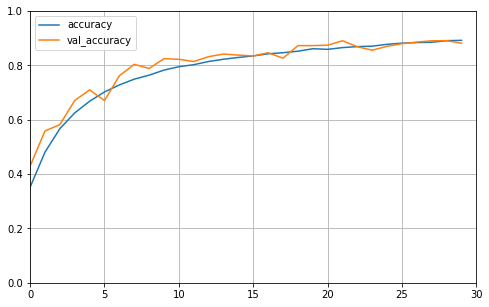

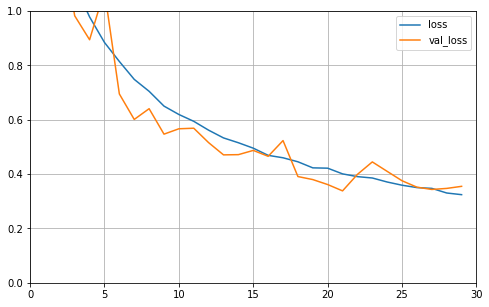

In [0]:
epochs = 30
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 1)

In [0]:
# 测试集数据生成
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory = './',
    x_col = 'filepath',
    y_col = 'class',
    classes = class_names,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 7,
    shuffle = False,
    class_mode = "sparse")
test_num = test_generator.samples
print(test_num)
print(test_generator.image_shape)

Found 300000 validated image filenames belonging to 10 classes.
300000


In [0]:
# 模型预测
test_predict = model.predict(test_generator,
                             workers=10,
                             use_multiprocessing=True)

In [0]:
print(test_predict.shape)

(300000, 10)


In [0]:
print(test_predict[0:5])

[[8.89645703e-03 9.90860388e-02 2.21215617e-02 3.32680419e-02
  2.21877662e-03 6.49703806e-03 2.74373405e-02 1.57152247e-02
  6.72360957e-02 7.17523456e-01]
 [8.15754056e-01 6.17072619e-02 6.59676222e-03 1.12473976e-03
  1.95191547e-04 5.07074255e-05 1.05969678e-03 7.87202443e-05
  8.61449353e-03 1.04818396e-01]
 [5.17094520e-07 7.66079187e-01 1.16821808e-04 7.46035585e-05
  3.26994893e-08 3.03690786e-06 5.12259357e-05 4.07178704e-05
  3.28886599e-05 2.33600944e-01]
 [3.29882766e-07 3.30548353e-08 8.82507678e-10 1.93208010e-08
  6.98109348e-09 3.64343528e-10 1.50343682e-09 4.53333399e-10
  9.99999642e-01 2.11371045e-08]
 [7.64201224e-01 7.83019699e-04 4.71560657e-03 1.15333672e-03
  8.11067177e-04 1.20370154e-04 1.76755741e-04 3.06271657e-04
  2.25183889e-01 2.54841219e-03]]


In [0]:
# 将最大的序号选出来
test_predict_class_indices = np.argmax(test_predict, axis = 1)

In [0]:
print(test_predict_class_indices[0:5])

[9 0 1 8 0]


In [0]:
# 输出序号对应的名字
test_predict_class = [class_names[index] for index in test_predict_class_indices]
print(test_predict_class[0:5])

['truck', 'airplane', 'automobile', 'ship', 'airplane']


In [0]:
def generate_submissions(filename, predict_class):
    with open(filename, 'w') as f:
        f.write('id,label\n')
        for i in range(len(predict_class)):
            f.write('%d,%s\n' % (i+1, predict_class[i]))

output_file = "submission.csv"
generate_submissions(output_file, test_predict_class)